# Cryptocurrency prices

* **Filename:**  `cryptocurrencies.csv`
* **Description:** Cryptocurrency prices for a handful of coins over time.
* **Source:** https://coinmarketcap.com/all/views/all/ but from a million years ago (I cut and pasted, honestly)
* **Topics:** 
    - Parsing time
    - Dealing with commas
    - Saving images as png/pdf

In [1]:
!ls

Cryptocurrency prices.ipynb cryptocurrencies.csv


In [3]:
import pandas as pd

%matplotlib inline

In [19]:
df = pd.read_csv("cryptocurrencies.csv", thousands=',')
df.head()

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC


In [20]:
df.tail()

,date,open,high,low,close,volume,market_cap,coin
2260,17-Feb-17,13.07,13.34,13.04,13.30,1711010,182332000,XMR
2261,16-Feb-17,13.62,13.62,12.91,13.10,3256190,189926000,XMR
2262,15-Feb-17,13.01,13.74,12.88,13.62,4811600,181497000,XMR
2263,14-Feb-17,12.20,13.20,12.11,12.99,4166850,170135000,XMR
2264,13-Feb-17,12.31,12.36,12.09,12.20,1687590,171557000,XMR


In [21]:
df.shape

(2265, 8)

In [22]:
df.dtypes

date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
market_cap      int64
coin           object
dtype: object

# What kinds of coins do we have here???

In [23]:
df.coin.value_counts()

XMR      365
ETH      365
XRP      365
BTC      365
LTC      365
MIOTA    245
BCH      195
Name: coin, dtype: int64

In [24]:
df = df[df.coin == 'BTC']
df.head()

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC


In [25]:
df.dtypes

date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
market_cap      int64
coin           object
dtype: object

In [27]:
# Hey, take that comma, get rid of it, and then turn the
# whole thing into a float 
# df.close.str.replace(",","").astype(float)

In [28]:
df.close.median()

3630.7

In [29]:
df.head()

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC


In [30]:
df.date.dtype

dtype('O')

In [32]:
df.head()

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC


## Converting a string column to a date

You can use `parse_dates=True` when reading in a file, but I like the do it manually with `pd.to_datetime`.

I don't trust `pd.to_datetime` to understand what the format is, so I want to specify the format myself. **How do you specify it?** Use http://strftime.org for secret codes

In [36]:
# pd.to_datetime(df.date, format="12-Feb-18")
# start from that, replace bit my bit
# If you want to ignore errors, errors='coerce'
df['datetime'] = pd.to_datetime(df.date, format="%d-%b-%y")
df.head()

,date,open,high,low,close,volume,market_cap,coin,datetime
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC,2018-02-12
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC,2018-02-11
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC,2018-02-10
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC,2018-02-09
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC,2018-02-08


# Plot the closing price of bitcoin over that timeframe

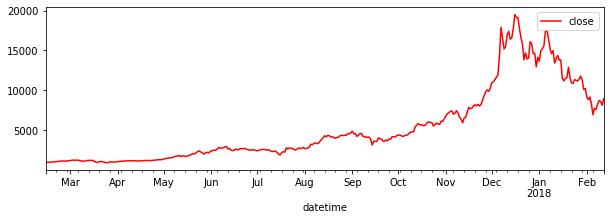

In [43]:
df.plot(x='datetime', y='close', figsize=(10, 3), color='red')

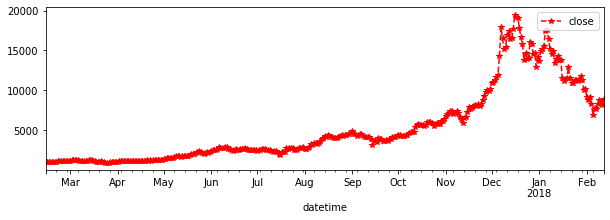

In [54]:
df.plot(x='datetime', y='close', figsize=(10, 3), color='red', linestyle='--', marker='*')

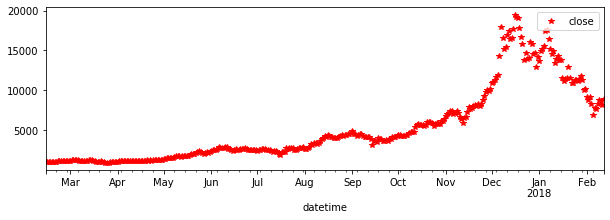

In [53]:
df.plot(x='datetime', y='close', figsize=(10, 3), color='red', linestyle='', marker='*')